# Importing libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import re

# Importing Dataset

In [2]:
# Loading the dataset
data = pd.read_csv('spam.csv', encoding = 'latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##### Removing unwanted columns

In [3]:
data = data.iloc[:, :2]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### Renaming column names

In [4]:
data = data.rename(columns = {'v1':'Class', 'v2':'Message'})
data

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,Class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Checking for missing values
data.isnull().sum()

Class      0
Message    0
dtype: int64

##### No missing values 

In [8]:
# Grouping by Class
data.groupby('Class').describe()

Message                                                               
        count unique                                                top freq
Class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
# We will now check the length of all the messages in the column
# Here we are trying to find out whether there is any relationship between length of messages and them being spam or ham
# We make a new column so we can also visualize the relationship
data['Length'] = data['Message'].apply(len)
data

,Class,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


##### Here we have  another column which represents the length of the messages in the 'Message' column

##### Let us visualize this column to get a better understanding

In [10]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Histogram of Length of Messages')

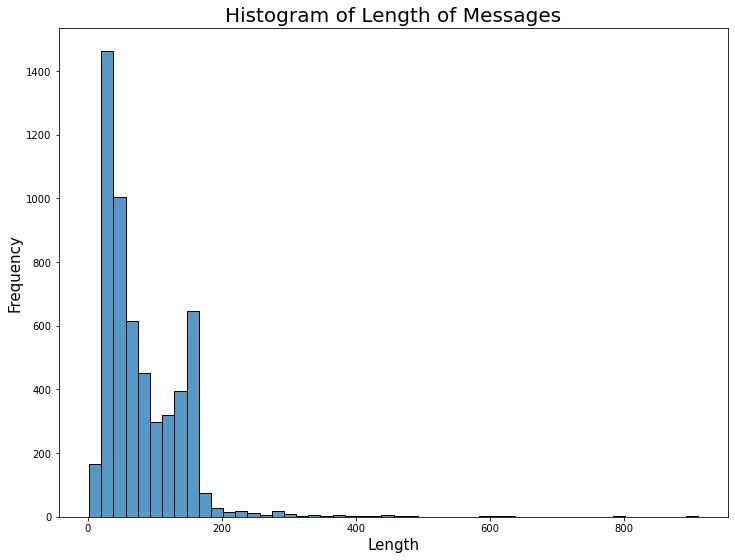

In [11]:
plt.figure(figsize = (12, 9))
sns.histplot(data['Length'], bins = 50, kde = False)
plt.xlabel('Length', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title("Histogram of Length of Messages", size = 20)

In [12]:
data['Length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

We see that the longest message is of length 910 and the average length of the message is 80. So lets see if we can differentiate between the spam or ham using the length of message

<Figure size 864x648 with 0 Axes>

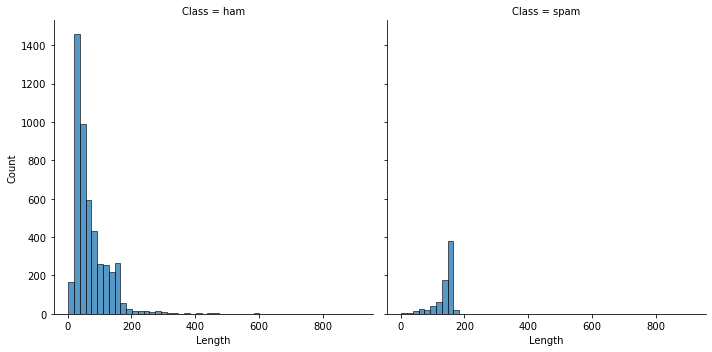

In [13]:
# Visualizing
plt.figure(figsize = (12, 9))
sns.displot(data, x = 'Length', col = 'Class', bins = 50, kde = False)

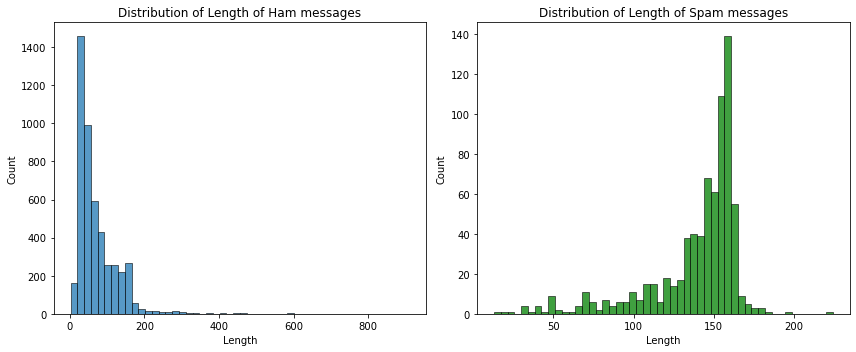

In [14]:
# Visualizing
plt.figure(figsize = (12, 5))


plt.subplot(1, 2, 1)
g = sns.histplot(data[data.Class == 'ham'].Length, bins = 50, kde = False)
p = plt.title('Distribution of Length of Ham messages')


plt.subplot(1, 2, 2)
g = sns.histplot(data[data.Class == 'spam'].Length, bins = 50, kde = False, color = 'green')
p = plt.title('Distribution of Length of Spam messages')


plt.tight_layout()

We observe that average length of Ham messages is around 100 whereas average length of Spam messages is around 150 so Spam messages tend to have more length.

One more parameter we can use to differentiate between spam and ham is currency symbols

In [15]:
# # Function to check if the message has a currency symbol or not
# # We only use a few very common currency symbols
# def currency_check(column):
#     symbols = ['₹', '$', '¥', '€', '£']
#     for i in symbols:
#         if i in column:
#             return 1 
#         else:
#             return 0

In [16]:
# Function to check if the message has a currency symbol or not
# We only use a few very common currency symbols and use regex
def currency_check(column):
    regex = re.compile("\\$|\\£|\\€|\\₹|\\¥")
    if(regex.search(column) == None):
        return 0
    else:
        return 1
        

In [17]:
data['Currency_symbol'] = data['Message'].apply(currency_check)

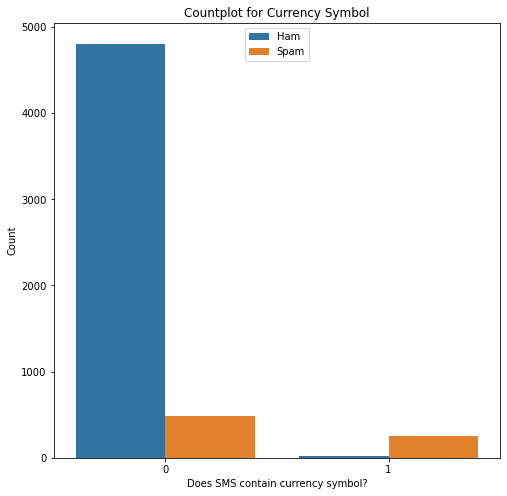

In [18]:
# Visualizing 
plt.figure(figsize=(8,8))
sns.countplot(x='Currency_symbol', data=data, hue='Class')
plt.title('Countplot for Currency Symbol')
plt.xlabel('Does SMS contain currency symbol?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)

In [19]:
spam_curr = 100*(len(data.loc[(data['Class'] == 'spam') & (data['Currency_symbol'] == 1)])/len(data[data.Class == 'spam']))
print('-------------------------------------')
print("The percentage of spam messages that contain currency symbols is {}%".format(round(spam_curr), 2))

-------------------------------------
The percentage of spam messages that contain currency symbols is 34%


As we can see 34% of the Spam messages have currency symbols in them. When we compare this with Ham, the currency symbols are barely used there.

Let us now also take a look if spam messages contain numbers.

In [20]:
# Function to check if the message has a number or not

def number_check(column):
    regex = re.compile('\d+')
    if(regex.search(column) == None):
        return 0
    else:
        return 1
    

In [21]:
data['Contains_number'] = data['Message'].apply(number_check)

In [22]:
data

,Class,Message,Length,Currency_symbol,Contains_number
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0,1
3,ham,U dun say so early hor... U c already then say...,49,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0,0


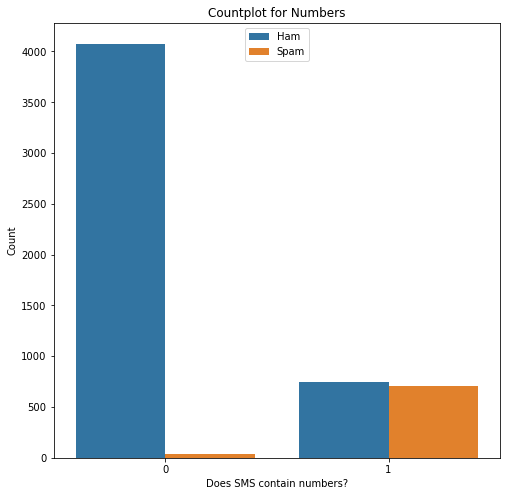

In [23]:
# Visualizing 
plt.figure(figsize=(8,8))
sns.countplot(x='Contains_number', data=data, hue='Class')
plt.title('Countplot for Numbers')
plt.xlabel('Does SMS contain numbers?')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'], loc=9)

In [24]:
spam_num = 100*(len(data.loc[(data['Class'] == 'spam') & (data['Contains_number'] == 1)])/len(data[data.Class == 'spam']))
print('-------------------------------------')
print("The percentage of spam messages that contain numbers is {}%".format(round(spam_num), 2))

-------------------------------------
The percentage of spam messages that contain numbers is 95%


As we can see that 95% of the spam messages contain numbers. This make numbers a highly significant feature.

Before fitting our model and cleaning the data we first need to check if the dataset is imbalanced or not.

Text(0, 0.5, 'Count')

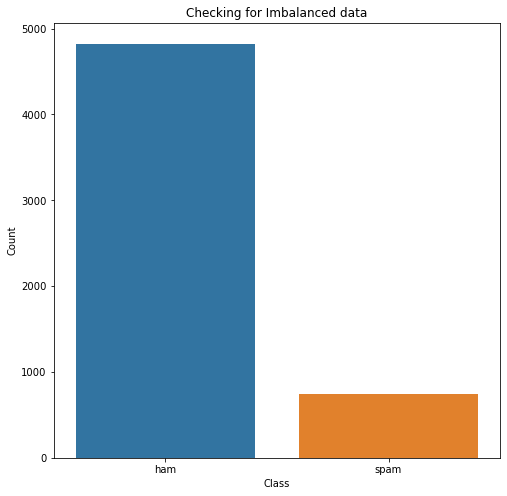

In [25]:
# Visualizing 
plt.figure(figsize=(8,8))
sns.countplot(x='Class', data=data)
plt.title('Checking for Imbalanced data')
plt.xlabel('Class')
plt.ylabel('Count')

In [26]:
spam_amt = 100*(len(data.loc[(data['Class'] == 'spam')])/len(data['Class']))
print('-------------------------------------')
print("The percentage of spam messages in the data is {}%".format(round(spam_amt), 2))

-------------------------------------
The percentage of spam messages in the data is 13%


As we can see above the Spam messages are only 13% of our data. We will need to balance our dataset before fitting the model

In [27]:
# Checking the length of words in a message
data["Word_count"] = data["Message"].apply(lambda x: len(x.split()))
data.head()

,Class,Message,Length,Currency_symbol,Contains_number,Word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0,20
1,ham,Ok lar... Joking wif u oni...,29,0,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0,1,28
3,ham,U dun say so early hor... U c already then say...,49,0,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0,13


In [28]:
# Lets visualize the most used words in the messages using a word cloud
# to do that we first need to clean the data by removing all special characters and numbers from the data.
# we will also need to remove stopwords 
# We only want the words to properly display the wordcloud
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yadnesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yadnesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(data.Message):

  # Cleaning special character from the sms
  Message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  Message = Message.lower()

  # Tokenizing the sms by words
  words = Message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  Message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(Message)

In [30]:
data['Corpus'] = corpus

Text(0.5, 1.0, 'Word Cloud of the Spam messages')

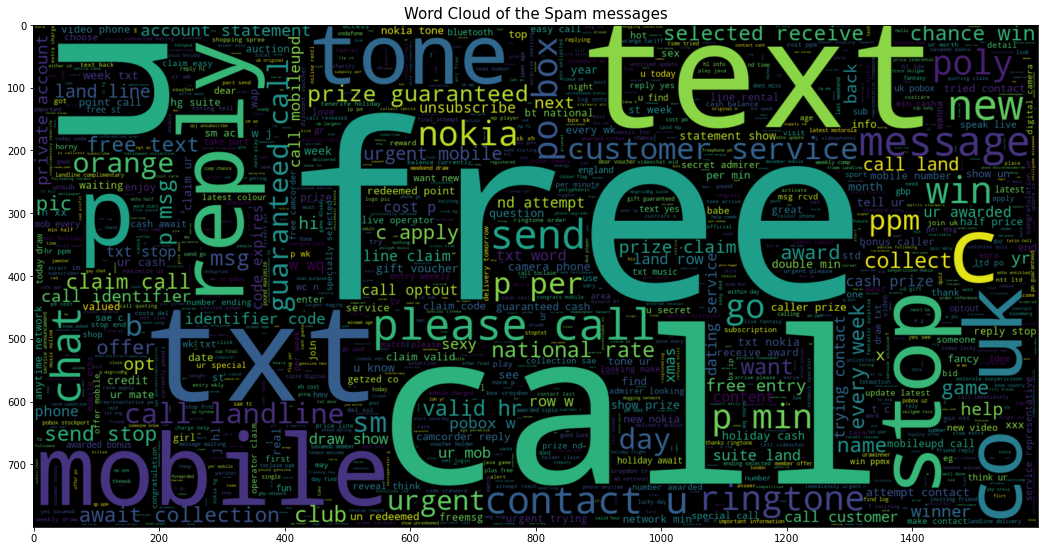

In [31]:
plt.figure(figsize = (18,18))
word_cloud = WordCloud(max_words = 2000,
                       width = 1600,
                       height = 800).generate(" ".join(data[data.Class == "spam"].Corpus))

plt.imshow(word_cloud , interpolation = 'bilinear')
plt.title("Word Cloud of the Spam messages", size = 15)

Text(0.5, 1.0, 'Word Cloud of the Ham messages')

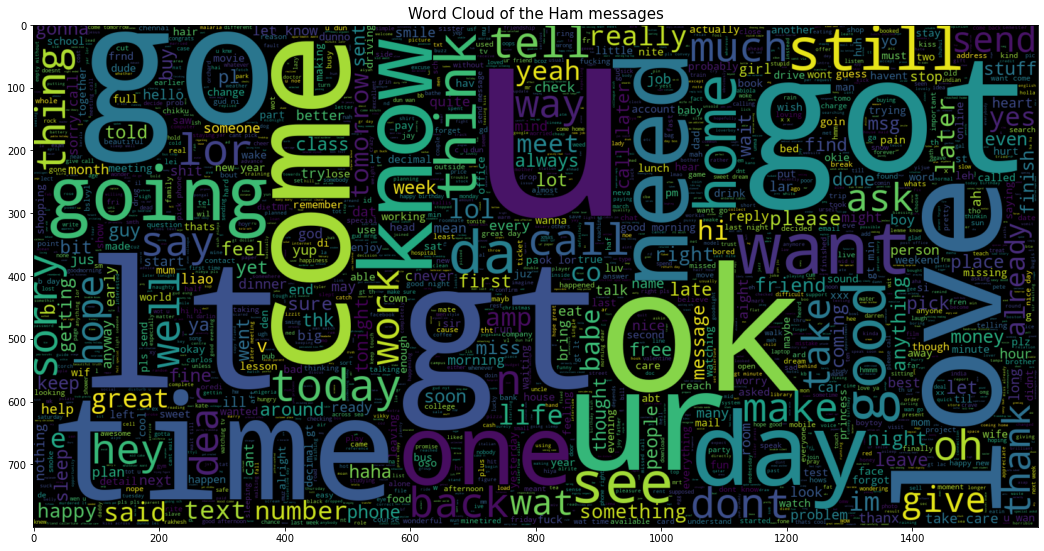

In [32]:
plt.figure(figsize = (18,18))
word_cloud = WordCloud(max_words = 2000,
                       width = 1600,
                       height = 800).generate(" ".join(data[data.Class == "ham"].Corpus))

plt.imshow(word_cloud , interpolation = 'bilinear')
plt.title("Word Cloud of the Ham messages", size = 15)

In [33]:
# For this problem we will use a bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [34]:
# Splitting X and y
X = pd.DataFrame(vectors, columns=feature_names)

# Encoding our class variable
data['Class'] = data['Class'].map({'ham': 0, 'spam': 1})
y = data['Class']

In [35]:
import pickle

# Saving the model
pickle.dump(tfidf, open('tfidf_transformed.pkl', 'wb'))

# # opening a file, where you ant to store the data
# file = open('tfidf_transformed.pkl', 'wb')

# # dumping information to that file
# pickle.dump(tfidf, file)

In [36]:
# Model Fitting
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
# We use Naive Bayes Algorithm for our problem
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
cross_val = cross_val_score(multi_nb, X, y, scoring='f1', cv=10)
print('Average f1-Score for Multinomial Naive Bayes model: {}'.format(round(cross_val.mean(), 3)))
print('---------------------------------------------------------')
print('Standard Deviation: {}'.format(round(cross_val.std(), 3)))

Average f1-Score for Multinomial Naive Bayes model: 0.918
---------------------------------------------------------
Standard Deviation: 0.023


In [39]:
multi_nb.fit(X_train, y_train)
y_pred = multi_nb.predict(X_test)

print('Classification report for Multinomial Naive Bayes model')
print('---------------------------------------------------------')
print(classification_report(y_test, y_pred))

Classification report for Multinomial Naive Bayes model
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score
print('---------------------------------------------------------')
print('F1-score: ', f1_score(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))

print('Recall: ', recall_score(y_test, y_pred))

---------------------------------------------------------
F1-score:  0.907142857142857
Precision:  0.9769230769230769
Recall:  0.8466666666666667


Text(33.0, 0.5, 'Actual')

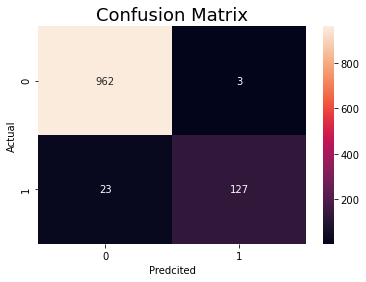

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g')
plt.title('Confusion Matrix', size = 18)
plt.xlabel('Predcited')
plt.ylabel('Actual')

In [42]:
# Trying sample messages
def spam_predict(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return multi_nb.predict(temp)

In [43]:
# Message 1
sample_message = "Earn $5000 to $50000 daily in stock market. Join India's most successful channel for free. Win weekly prizes after sucessful membership"
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [44]:
# Message 2
sample_message = "IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out."
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [45]:
# Message 3
sample_message = "Hello, how are you? been a while since we talked"
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a HAM message.


In [46]:
# Message 4
sample_message = "Congratulations! you have won $1000 in Amazon giftcard. Go to the link http://bit.ly/sample to claim your prize"
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [47]:
# Message 5
sample_message = "BINANCE Amount recieved 3.4 BTC ($163093.92)USD. Please confirn the transcation from the link http://binance/scam to claim your BTC"
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [48]:
# Message 6
sample_message = "Dear Customer, Your account no ending with 000230 is debited with INR 170.00 towards UPI Your Current Bal is INR25 CR - City Bank"
if spam_predict(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM message.')

This is a SPAM message.


In [49]:
# Saving the model
pickle.dump(multi_nb, open('spam_mnb.pkl', 'wb'))

# # opening a file, where you ant to store the data
# file = open('spam_mnb.pkl', 'wb')

# # dumping information to that file
# pickle.dump(multi_nb, file)